In [1]:
name='user'

In [2]:
import pandas as pd
import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from numpy import var
from math import sqrt
from math import log
from math import exp
import os
import glob
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt #used for visualization purposes in this tutorial.
import numpy as np
import pysiology

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore


In [3]:
if not os.path.exists(f"./Datasets/{name}/results"): 
    # if the demo_folder directory is not present  
    # then create it. 
    os.makedirs(f"./Datasets/{name}/results") 

csvs_rest = glob.glob(f"./Datasets/{name}/rest/*.csv")
csvs_index = glob.glob(f"./Datasets/{name}/index/*.csv")
csvs_closed = glob.glob(f"./Datasets/{name}/closed/*.csv")
csvs_middle_finger = glob.glob(f"./Datasets/{name}/middle-finger/*.csv")
csvs_cylindrical = glob.glob(f"./Datasets/{name}/cylindrical/*.csv")

df_rest = pd.DataFrame()
df_index = pd.DataFrame()
df_closed = pd.DataFrame()
df_middle_finger = pd.DataFrame()
df_cylindrical_bottle = pd.DataFrame()
for c in csvs_rest:
    if df_rest.empty:
        df_rest = pd.read_csv(c)
    else:
        df_rest = pd.concat([df_rest,pd.read_csv(c)]).reset_index(drop=True)
        
for c in csvs_index:
    if df_index.empty:
        df_index = pd.read_csv(c)
    else:
        df_index = pd.concat([df_index,pd.read_csv(c)]).reset_index(drop=True)
        
for c in csvs_closed:
    if df_closed.empty:
        df_closed = pd.read_csv(c)
    else:
        df_closed = pd.concat([df_closed,pd.read_csv(c)]).reset_index(drop=True)
        
for c in csvs_middle_finger:
    if df_middle_finger.empty:
        df_middle_finger = pd.read_csv(c)
    else:
        df_middle_finger = pd.concat([df_middle_finger,pd.read_csv(c)]).reset_index(drop=True)
        
for c in csvs_cylindrical:
    if df_cylindrical_bottle.empty:
        df_cylindrical_bottle = pd.read_csv(c)
    else:
        df_cylindrical_bottle = pd.concat([df_cylindrical_bottle,pd.read_csv(c)]).reset_index(drop=True)
        
        
index_emg1=df_index.iloc[0:,1]
index_emg3=df_index.iloc[0:,3]
index_emg8=df_index.iloc[0:,8]

middle_emg1=df_middle_finger.iloc[0:,1]
middle_emg3=df_middle_finger.iloc[0:,3]
middle_emg8=df_middle_finger.iloc[0:,8]

closed_emg1=df_closed.iloc[0:,1]
closed_emg3=df_closed.iloc[0:,3]
closed_emg8=df_closed.iloc[0:,8]

cylindrical_emg1=df_cylindrical_bottle.iloc[0:,1]
cylindrical_emg3=df_cylindrical_bottle.iloc[0:,3]
cylindrical_emg8=df_cylindrical_bottle.iloc[0:,8]

rest_emg1=df_rest.iloc[0:,1]
rest_emg3=df_rest.iloc[0:,3]
rest_emg8=df_rest.iloc[0:,8]


index=[]
middle=[]
closed=[]
cylinder=[]
rest=[]

index.append([index_emg1])
index.append([index_emg3])
index.append([index_emg8])

middle.append([middle_emg1])
middle.append([middle_emg3])
middle.append([middle_emg8])

closed.append([closed_emg1])
closed.append([closed_emg3])
closed.append([closed_emg8])

cylinder.append([cylindrical_emg1])
cylinder.append([cylindrical_emg3])
cylinder.append([cylindrical_emg8])

rest.append([rest_emg1])
rest.append([rest_emg3])
rest.append([rest_emg8])

gestures=[]
gestures.append(index)
gestures.append(middle)
gestures.append(closed)
gestures.append(cylinder)
gestures.append(rest)

In [4]:
df_features=[]
df_features_tmp=[]
for k in range(0,len(gestures)):
    EMG=gestures[k][0][0]
    emg_data=[]
    for l in range(0,len(EMG)):
        emg_data.append(EMG[l])
    
    
    sr = 200 #samplerate in Hz
    events=[]
    for i in range(0,100):
        events.append([str(i),i]) 
    eventLength =8 #lenght in seconds we want to use to compute feature estimation
    results = {} #we will store the results in a dict for simplicity.
    for event in events:
        startSample = sr * event[1] #samplerate of the signal multiplied by the onset of the event in s
        endSample = startSample + (sr * eventLength) #Final sample to use for estimation
        results[event[0]] = {} #initialize the results
        results[event[0]]["EMG"] = pysiology.electromyography.analyzeEMG(emg_data[startSample:endSample],sr) #analyze the EMG signal
    
    event_list=[]
    for i in range(0,len(events)):
        event_list.append(str(i))
    feature_list=["IEMG","MAV","MAV1","MAV2","SSI","VAR","TM3","TM4","TM5","LOG","RMS","WL","AAC","DASDV","AFB","ZC","MYOP","WAMP","SSC"]
    
    #############################
    feature_vector=[]
    tmp=[]
    for e in event_list:
        for feature in feature_list:
           # print(feature, "=",results[e]["EMG"]["TimeDomain"][feature])
            tmp.append(results[e]["EMG"]["TimeDomain"][feature])
        feature_vector.append(tmp)
        tmp=[]

    ###############################
    tmp1=[]
    feature_series=[]
    for j in range(len(feature_list)):
        for i in range(len(feature_vector)):
            tmp1.append(feature_vector[i][j])
        feature_series.append(tmp1)
        tmp1=[]
    ###############################    
    data={'IEMG':feature_series[0],'MAV':feature_series[1],'MAV1':feature_series[2],'MAV2':feature_series[3],'SSI':feature_series[4],'VAR':feature_series[5],'TM3':feature_series[6],'TM4':feature_series[7],'TM5':feature_series[8],'LOG':feature_series[9],'RMS':feature_series[10],'WL':feature_series[11],'AAC':feature_series[12],'DASDV':feature_series[13],'AFB':feature_series[14],'ZC':feature_series[15],'MYOP':feature_series[16],'WAMP':feature_series[17],'SSC':feature_series[18]}
    #df_index_features = pd.DataFrame(data, columns=feature_list)
    df_features_tmp=pd.DataFrame(data, columns=feature_list)
    df_features_tmp['class']=k
    df_features.append([df_features_tmp])
    df_features_tmp=[]
    


emg_features=pd.concat([df_features[0][0],
                        df_features[1][0],
                        df_features[2][0],
                       df_features[3][0],
                       df_features[4][0]])

C:\Users\Praahas\AppData\Local\Programs\Python\Python39\lib\site-packages\pysiology\electromyography.py:690: RuntimeWarning:

divide by zero encountered in double_scalars



In [5]:
emg_features

,IEMG,MAV,MAV1,MAV2,SSI,VAR,TM3,TM4,TM5,LOG,RMS,WL,AAC,DASDV,AFB,ZC,MYOP,WAMP,SSC,class
0,1652.222073,1.032639,0.629447,0.160627,11948.231968,7.472315,22.618630,2625.194866,30554.637226,2.808467,2.732699,1908.560239,1.192850,9.786383,0.028861,615,0.988750,784,356,0
1,1822.546512,1.139092,0.677536,-0.181633,13296.025304,8.315213,25.265600,2710.519641,31315.449570,3.123929,2.882710,2067.318202,1.292074,10.881108,-0.008593,607,0.987500,784,354,0
2,1776.803457,1.110502,0.926479,0.626895,13206.697668,8.259348,25.275346,2710.297954,31315.579816,3.035883,2.873010,2013.544632,1.258465,10.806365,0.020716,604,0.988125,770,354,0
3,1769.912546,1.106195,0.995733,0.879001,13194.530855,8.251739,25.272383,2710.274315,31315.554550,3.022836,2.871686,2001.878966,1.251174,10.791003,0.025665,602,0.988750,779,349,0
4,2016.245198,1.260153,1.073563,0.866488,15045.996143,9.409629,28.644467,2841.108563,32393.292183,3.525962,3.066553,2279.197955,1.424499,12.086741,0.036228,603,0.987500,787,345,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,744.726006,0.465454,0.349842,0.236075,532.069919,0.332752,0.005999,0.309200,0.003783,1.592737,0.576666,809.068882,0.505668,0.405324,0.051678,574,0.988125,811,345,4
96,730.566234,0.456604,0.346661,0.241689,515.482521,0.322378,0.000699,0.294815,0.005616,1.578703,0.567606,798.751830,0.499220,0.394620,-0.030723,580,0.987500,810,345,4
97,717.644275,0.448528,0.342598,0.243150,500.772796,0.313179,0.011130,0.279387,0.032110,1.566005,0.559449,787.441868,0.492151,0.384900,-0.057688,578,0.985625,806,339,4
98,707.768296,0.442355,0.333681,0.231012,486.290832,0.304122,0.012807,0.259245,0.018068,1.556368,0.551300,775.742734,0.484839,0.371692,-0.017486,571,0.986250,795,344,4


In [6]:
emg_features.reset_index()
#Writing to text Files
#f"emg_features_"+{name}+".csv"
emg_features.to_csv(f"emg_features_{name}.csv", sep=',', index=False)

In [7]:
dataset=pd.read_csv(f"emg_features_{name}.csv")

[[39  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 26  0  0]
 [ 0  8  0 23  0]
 [ 0  0  0  0 31]]
Accuracy: 94.66666666666667% F1 Score: 94.66666666666667% Precision: 96.04301075268818% Recall: 94.66666666666667%


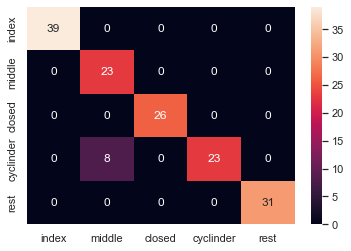

In [8]:
dataset=pd.read_csv(f"emg_features_{name}.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)



import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_recall_fscore_support, f1_score, confusion_matrix
cols = ["index", "middle", "closed", "cyclinder","rest"]
#print('Logistic Regression')
#print('Accuracy: ', accuracy_score(y_test, y_pred))

accuracy=(accuracy_score(y_test, y_pred))*100
f1 = (f1_score(y_test, y_pred, average='weighted'))*100
precision, recall, _, _= precision_recall_fscore_support(y_test,y_pred, average='weighted')
precision=precision*100
recall=recall*100
print(f"Accuracy: {accuracy}% F1 Score: {f1}% Precision: {precision}% Recall: {recall}%")

sns.set()
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=cols, columns=cols)

# plt.figure(figsize = (16,5))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.savefig(f'Datasets/{name}/results/{name}-Decision Tree confusion matrix.svg')
plt.show()



[[38  1  0  0  0]
 [ 1 21  0  1  0]
 [ 0  0 24  2  0]
 [ 3 13  0 15  0]
 [ 0  0  0  0 31]]
Accuracy: 86.0% F1 Score: 85.4582378954136% Precision: 87.94603174603175% Recall: 86.0%


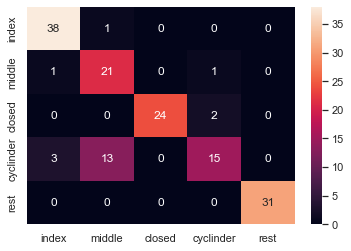

In [9]:
dataset=pd.read_csv(f"emg_features_{name}.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)



import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_recall_fscore_support, f1_score, confusion_matrix
cols = ["index", "middle", "closed", "cyclinder","rest"]
#print('Logistic Regression')
#print('Accuracy: ', accuracy_score(y_test, y_pred))

accuracy=(accuracy_score(y_test, y_pred))*100
f1 = (f1_score(y_test, y_pred, average='weighted'))*100
precision, recall, _, _= precision_recall_fscore_support(y_test,y_pred, average='weighted')
precision=precision*100
recall=recall*100
print(f"Accuracy: {accuracy}% F1 Score: {f1}% Precision: {precision}% Recall: {recall}%")

sns.set()
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=cols, columns=cols)

# plt.figure(figsize = (16,5))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.savefig(f'Datasets/{name}/results/{name}-SVM-R confusion matrix.svg')
plt.show()



In [10]:
dataset=pd.read_csv(f"emg_features_{name}.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_accuracy(history):
    # summarize history for accuracy
    #plt.clf()
    plt.style.use('ggplot')
    #plt.grid(b=None)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'], linestyle='--')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
   # plt.figure(figsize=[5,5])
    plt.savefig(f'Datasets/{name}/results/{name}-accuracy.svg')
def plot_loss(history):    
    # summarize history for loss
    #plt.clf()
    plt.style.use('ggplot')
    #plt.grid(b=None)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'], linestyle='--')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper right')
    #plt.figure(figsize=[5,5])
    plt.savefig(f'Datasets/{name}/results/{name}-loss.svg')

In [12]:
from tensorflow.keras import optimizers
import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping
activation_fn = 'relu'
# optimizer = 'rmsprop'
optimizer = optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=True)
num_nodes_1 = 512
num_nodes_2 = 256
num_nodes_3 = 128
num_nodes_4 = 64
dropout1 = 0.4
dropout2 = 0.3
dropout3 = 0.2
dropout4 = 0.1
l2 = tf.keras.regularizers.l2(0.003)
# es = EarlyStopping(monitor='loss', mode='min', verbose=1)

inp_size = X_train.shape[1]

import tensorflow as tf
inp_size = X_train.shape[1]
model = tf.keras.model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(inp_size, )),
    tf.keras.layers.Dense(num_nodes_1, activation=activation_fn, kernel_regularizer=l2),
    tf.keras.layers.Dropout(dropout1),
    tf.keras.layers.Dense(num_nodes_2, activation=activation_fn, kernel_regularizer=l2),
    tf.keras.layers.Dropout(dropout2),
    tf.keras.layers.Dense(num_nodes_3, activation=activation_fn, kernel_regularizer=l2),
    tf.keras.layers.Dropout(dropout3),
    tf.keras.layers.Dense(num_nodes_4, activation=activation_fn, kernel_regularizer=l2),
    tf.keras.layers.Dropout(dropout4),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

def train_fit(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))
#     summary_writer = tf.summary.create_file_writer('/tmp/summaries')
#     with summary_writer.as_default():
#         tf.summary.scalar('loss', 0.1, step=42)
    return history


history = train_fit(model, X_train, y_train, X_test, y_test)

weights = model.get_weights()

history.history.keys()


C:\Users\Praahas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/200
11/11 [==============================] - 2s 24ms/step - loss: 2.8922 - accuracy: 0.4514 - val_loss: 2.2847 - val_accuracy: 0.5667
Epoch 2/200
11/11 [==============================] - 0s 10ms/step - loss: 2.0599 - accuracy: 0.7086 - val_loss: 1.7564 - val_accuracy: 0.7733
Epoch 3/200
11/11 [==============================] - 0s 10ms/step - loss: 1.6600 - accuracy: 0.8086 - val_loss: 1.4918 - val_accuracy: 0.8133
Epoch 4/200
11/11 [==============================] - 0s 10ms/step - loss: 1.3817 - accuracy: 0.8257 - val_loss: 1.1912 - val_accuracy: 0.8667
Epoch 5/200
11/11 [==============================] - 0s 10ms/step - loss: 1.1500 - accuracy: 0.8714 - val_loss: 1.2860 - val_accuracy: 0.8200
Epoch 6/200
11/11 [==============================] - 0s 11ms/step - loss: 1.0955 - accuracy: 0.8600 - val_loss: 0.9793 - val_accuracy: 0.8533
Epoch 7/200
11/11 [==============================] - 0s 11ms/step - loss: 0.9758 - accuracy: 0.8629 - val_loss: 0.9351 - val_accuracy: 0.8467
Epoch 

11/11 [==============================] - 0s 13ms/step - loss: 0.2885 - accuracy: 0.9857 - val_loss: 0.4361 - val_accuracy: 0.9533
Epoch 116/200
11/11 [==============================] - 0s 13ms/step - loss: 0.2858 - accuracy: 0.9771 - val_loss: 0.4128 - val_accuracy: 0.9200
Epoch 117/200
11/11 [==============================] - 0s 13ms/step - loss: 0.2711 - accuracy: 0.9800 - val_loss: 0.4398 - val_accuracy: 0.9267
Epoch 118/200
11/11 [==============================] - 0s 13ms/step - loss: 0.3057 - accuracy: 0.9857 - val_loss: 0.4641 - val_accuracy: 0.9400
Epoch 119/200
11/11 [==============================] - 0s 13ms/step - loss: 0.2936 - accuracy: 0.9686 - val_loss: 0.4341 - val_accuracy: 0.9133
Epoch 120/200
11/11 [==============================] - 0s 13ms/step - loss: 0.2676 - accuracy: 0.9829 - val_loss: 0.4955 - val_accuracy: 0.9133
Epoch 121/200
11/11 [==============================] - 0s 13ms/step - loss: 0.2704 - accuracy: 0.9771 - val_loss: 0.4427 - val_accuracy: 0.9267
Epoch 

Epoch 172/200
11/11 [==============================] - 0s 13ms/step - loss: 0.3241 - accuracy: 0.9543 - val_loss: 0.5344 - val_accuracy: 0.9000
Epoch 173/200
11/11 [==============================] - 0s 13ms/step - loss: 0.3239 - accuracy: 0.9514 - val_loss: 0.5379 - val_accuracy: 0.9000
Epoch 174/200
11/11 [==============================] - 0s 12ms/step - loss: 0.3153 - accuracy: 0.9600 - val_loss: 0.4320 - val_accuracy: 0.9200
Epoch 175/200
11/11 [==============================] - 0s 13ms/step - loss: 0.2777 - accuracy: 0.9771 - val_loss: 0.3939 - val_accuracy: 0.9333
Epoch 176/200
11/11 [==============================] - 0s 13ms/step - loss: 0.2981 - accuracy: 0.9743 - val_loss: 0.5349 - val_accuracy: 0.9067
Epoch 177/200
11/11 [==============================] - 0s 13ms/step - loss: 0.3041 - accuracy: 0.9743 - val_loss: 0.4168 - val_accuracy: 0.9067
Epoch 178/200
11/11 [==============================] - 0s 13ms/step - loss: 0.3116 - accuracy: 0.9771 - val_loss: 0.4584 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

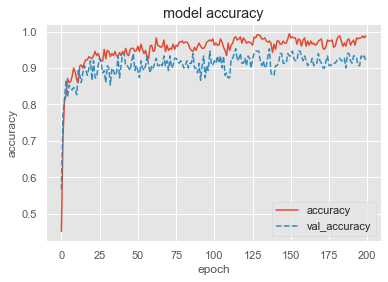

In [13]:
plot_accuracy(history)

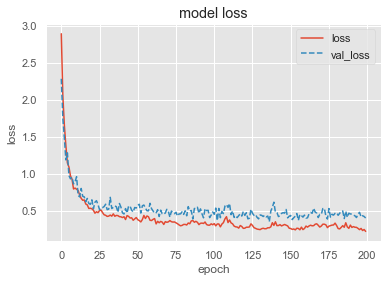

In [14]:
plot_loss(history)